In [36]:
import sys
import os

# Projektverzeichnis
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Füge dem sys.path hinzu, falls noch nicht vorhanden
if project_root not in sys.path:
    sys.path.append(project_root)

anzahl_kerne = os.cpu_count()
print(f"Anzahl der CPU-Kerne: {anzahl_kerne}")  

Anzahl der CPU-Kerne: 20


In [ ]:
# Datenzugriff
from configs.path_manager import get_path

# Utils
import src.utils.analize.nervousness_comparator as nerv_comparator
import src.utils.analize.plotter_proof as proof
import src.utils.analize.calc as calc


# Extern
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 26)

In [ ]:
data_path = get_path("data", "cp_lateness")

def get_file_path(prefix: str = "", text: str = "schedule"):
    return data_path / f"{prefix}_{text}.csv"

In [4]:
day_numb = 1

file = get_file_path(prefix="02", text=f"schedule_{day_numb:02d}_init")

df_plan_init =  pd.read_csv(file)
df_plan_init = df_plan_init.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan_init

,Job,Production_Plan_ID,Operation,Machine,Arrival,Deadline,Start,Processing Time,End,Lateness,Tardiness,Earliness
0,0,0,0,M00,51,3806,2012,29,2041,-1765,0,1765
1,0,0,1,M01,51,3806,2314,78,2392,-1414,0,1414
2,0,0,2,M02,51,3806,2392,9,2401,-1405,0,1405
3,0,0,3,M03,51,3806,2621,36,2657,-1149,0,1149
4,0,0,4,M04,51,3806,2722,49,2771,-1035,0,1035
...,...,...,...,...,...,...,...,...,...,...,...,...
175,17,3,5,M08,1343,4017,2572,52,2624,-1393,0,1393
176,17,3,6,M07,1343,4017,2675,85,2760,-1257,0,1257
177,17,3,7,M03,1343,4017,2760,98,2858,-1159,0,1159
178,17,3,8,M09,1343,4017,2858,22,2880,-1137,0,1137


In [5]:
df_last_ops_init = df_plan_init.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
df_last_ops_init.head()

,Job,Production_Plan_ID,Operation,Machine,Arrival,Deadline,Start,Processing Time,End,Lateness,Tardiness,Earliness
9,0,0,9,M09,51,3806,3785,21,3806,0,0,0
19,1,1,9,M08,136,2999,2969,30,2999,0,0,0
29,2,2,9,M04,158,3725,3692,33,3725,0,0,0
39,3,3,9,M05,236,2443,2400,43,2443,0,0,0
49,4,4,9,M06,404,3814,3761,53,3814,0,0,0


In [6]:
def append_plans_and_last_ops(schedule_prefix: str, last_planning_start: int, df_plan_list: list, df_last_ops_list: list):
    for day_numb in range(2, last_planning_start + 1):
        file = get_file_path(prefix=schedule_prefix, text=f"schedule_{day_numb:02d}")
        df_plan_temp = pd.read_csv(file)
        df_plan_temp = df_plan_temp.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
        df_plan_list.append(df_plan_temp)

        df_last_ops = df_plan_temp.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
        df_last_ops_list.append(df_last_ops)


### Mit "Deviation Penalty"

In [7]:
# init devpen
df_plan_devpen_list = []
df_plan_devpen_last_ops_list = []

df_plan_devpen_list.append(df_plan_init)
df_plan_devpen_last_ops_list.append(df_last_ops_init)

In [8]:
append_plans_and_last_ops("04_devpen", last_planning_start = 6,
                          df_plan_list = df_plan_devpen_list,
                          df_last_ops_list = df_plan_devpen_last_ops_list)

In [9]:
df_plan_devpen_last_ops_list[0]

,Job,Production_Plan_ID,Operation,Machine,Arrival,Deadline,Start,Processing Time,End,Lateness,Tardiness,Earliness
9,0,0,9,M09,51,3806,3785,21,3806,0,0,0
19,1,1,9,M08,136,2999,2969,30,2999,0,0,0
29,2,2,9,M04,158,3725,3692,33,3725,0,0,0
39,3,3,9,M05,236,2443,2400,43,2443,0,0,0
49,4,4,9,M06,404,3814,3761,53,3814,0,0,0
59,5,5,9,M07,485,3488,3463,25,3488,0,0,0
69,6,6,9,M04,501,3023,2968,55,3023,0,0,0
79,7,7,9,M03,528,4994,4915,79,4994,0,0,0
89,8,8,9,M08,550,3813,3739,74,3813,0,0,0
99,9,9,9,M07,559,3137,3092,45,3137,0,0,0


### Ohne "Deviation Penalty" (Simple)

In [10]:
# init simple
df_plan_simple_list = []
df_plan_simple_last_ops_list = []

df_plan_simple_list.append(df_plan_init)
df_plan_simple_last_ops_list.append(df_last_ops_init)

In [11]:
append_plans_and_last_ops("03_simple", last_planning_start = 6,
                          df_plan_list = df_plan_simple_list,
                          df_last_ops_list = df_plan_simple_last_ops_list)

In [12]:
df_plan_simple_last_ops_list[-1]

,Job,Production_Plan_ID,Operation,Machine,Arrival,Deadline,Start,Processing Time,End,Lateness,Tardiness,Earliness
1,75,3,9,M05,5853,9132,9089,43,9132,0,0,0
2,79,5,9,M07,6229,8712,8687,25,8712,0,0,0
3,80,1,9,M08,6271,8824,8794,30,8824,0,0,0
8,82,3,9,M05,6310,9589,9546,43,9589,0,0,0
9,83,7,9,M03,6371,9069,8990,79,9069,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
301,120,1,9,M08,8538,11091,11061,30,11091,0,0,0
311,121,5,9,M07,8548,11031,11006,25,11031,0,0,0
321,122,9,9,M07,8558,11261,11216,45,11261,0,0,0
331,123,8,9,M08,8566,11555,11481,74,11555,0,0,0


## I) Abweichung vom Wunschtermin (Deadline)

### a) Simple

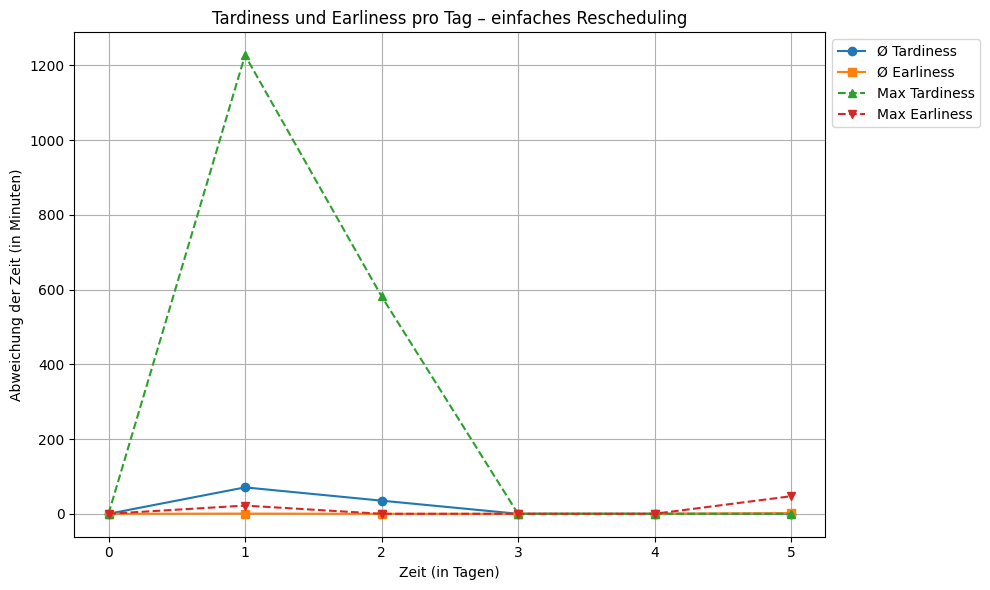

In [13]:
proof.plot_mean_and_max_tardiness_earliness(df_plan_simple_last_ops_list,
                                      subtitle = "einfaches Rescheduling",
                                      show_max=True)


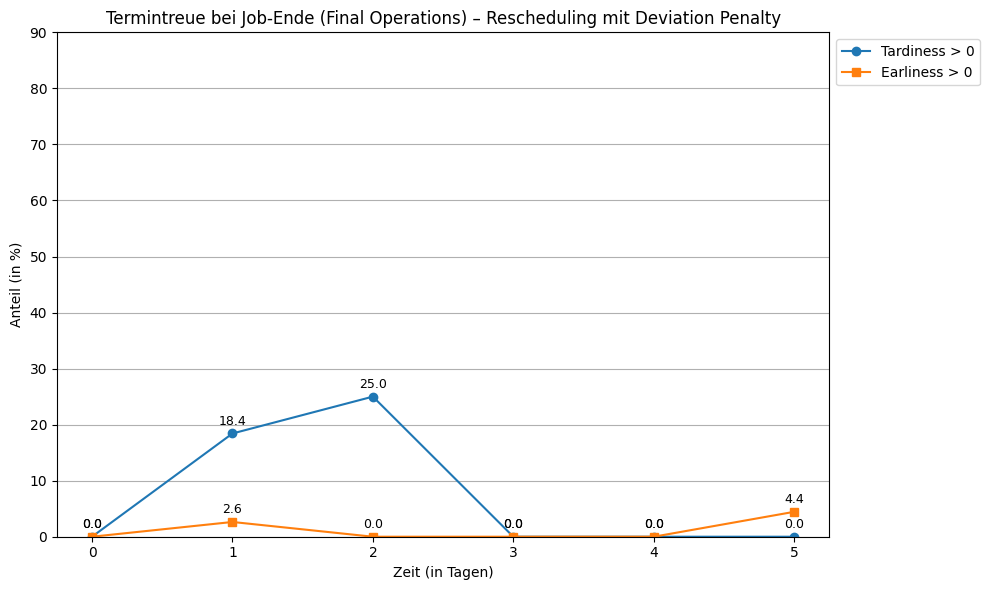

In [14]:
simple_tardi_ratio, simple_earli_ratio, simple_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_simple_last_ops_list)

proof.plot_tardiness_earliness_ideal_per_day(
    simple_tardi_ratio,
    simple_earli_ratio,
#    simple_ideal_ratio,
    subtitle = "Rescheduling mit Deviation Penalty",
    y_lim = 90
)

### b) Mit Deviation Penalty

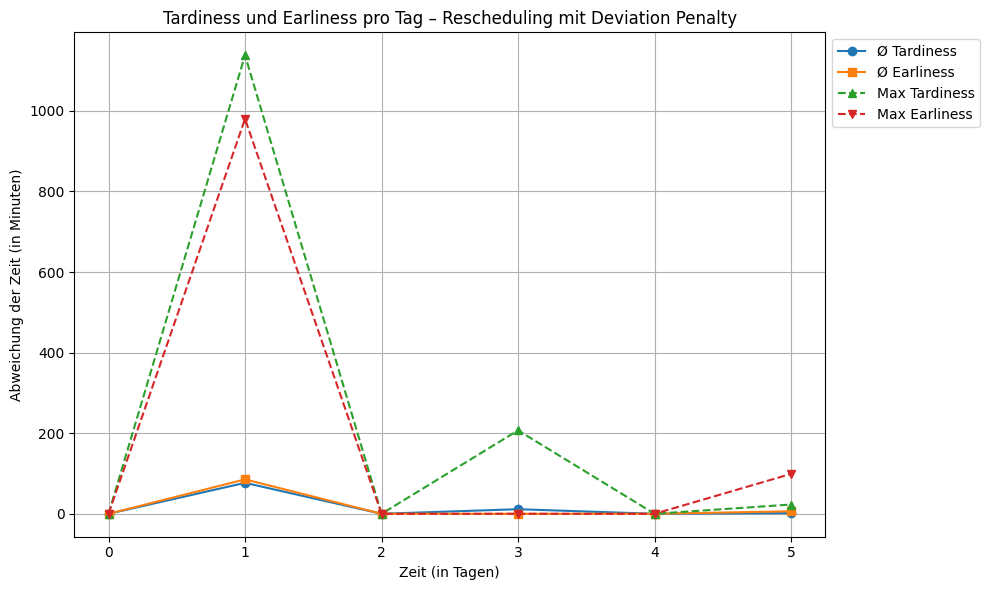

In [15]:
proof.plot_mean_and_max_tardiness_earliness(df_plan_devpen_last_ops_list, 
                                      subtitle = "Rescheduling mit Deviation Penalty",
                                      show_max=True)


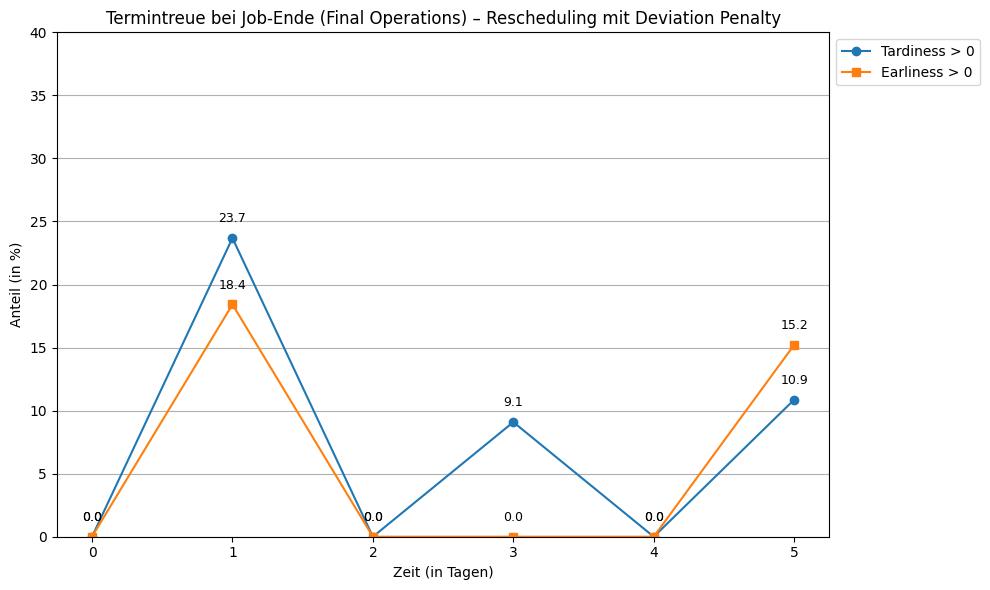

In [16]:
devpen_tardi_ratio, devpen_earli_ratio, devpen_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_ideal_per_day(
    devpen_tardi_ratio,
    devpen_earli_ratio,
#    devpen_ideal_ratio,
    subtitle = "Rescheduling mit Deviation Penalty",
    y_lim = 40
)


### C) Vergleich

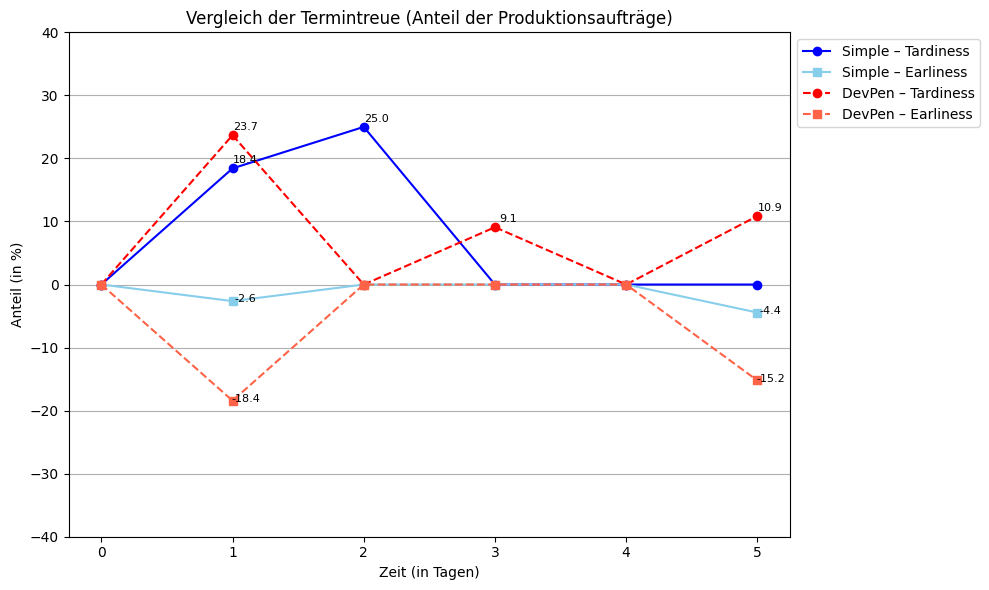

In [17]:
proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    labels=("Simple", "DevPen"),
    ylabel="Anteil (in %)",
    subtitle = "(Anteil der Produktionsaufträge)",
    y_lim_min=-40,
    y_lim_max=40,
    as_percentage=True
)


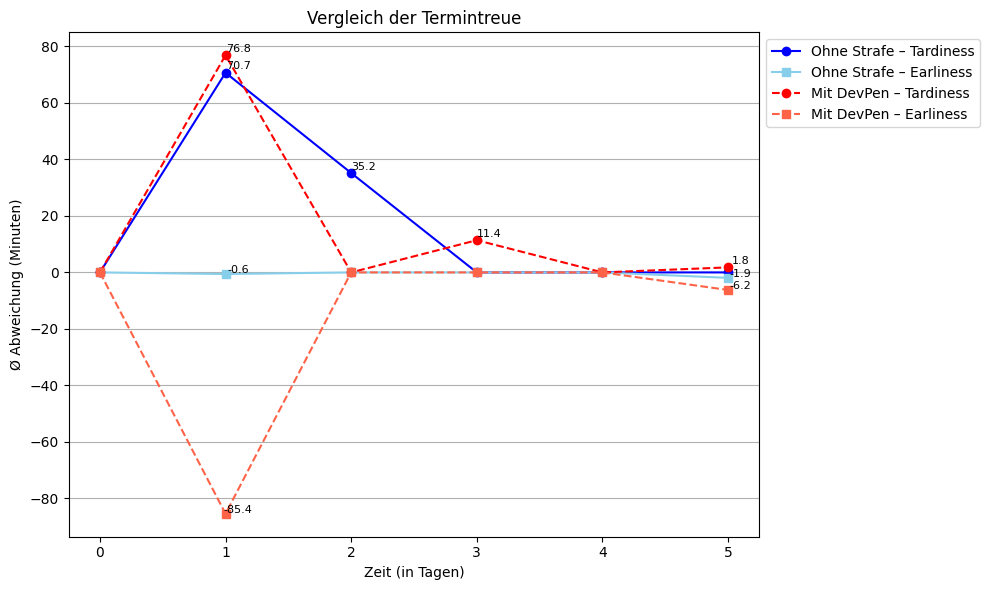

In [18]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    labels=("Ohne Strafe", "Mit DevPen"),
    ylabel="Ø Abweichung (Minuten)",
    subtitle = "",
    as_percentage=False
)

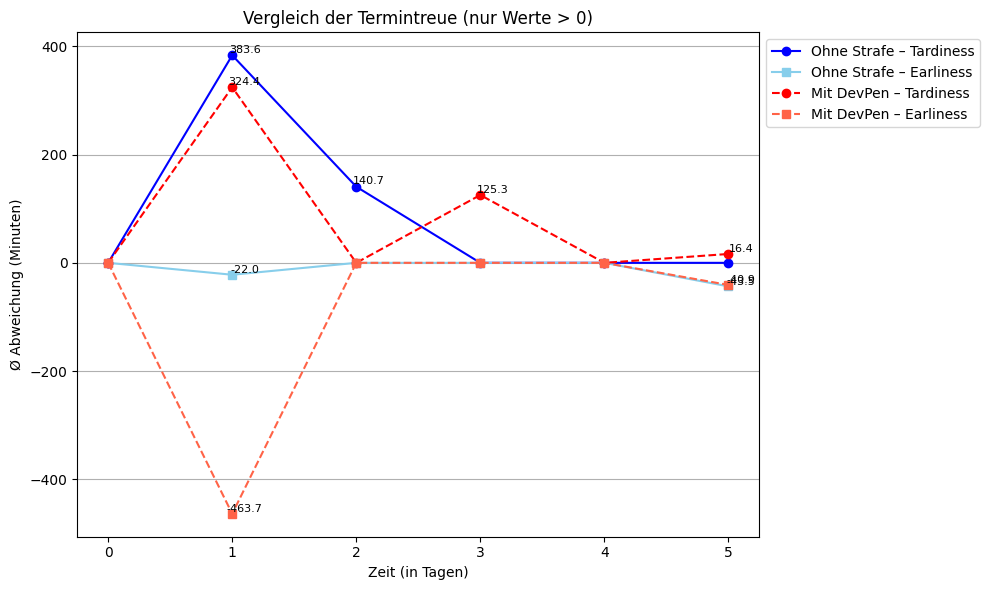

In [19]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_nonzero_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_nonzero_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    labels=("Ohne Strafe", "Mit DevPen"),
    ylabel="Ø Abweichung (Minuten)",
    subtitle = "(nur Werte > 0)",
    as_percentage=False
)

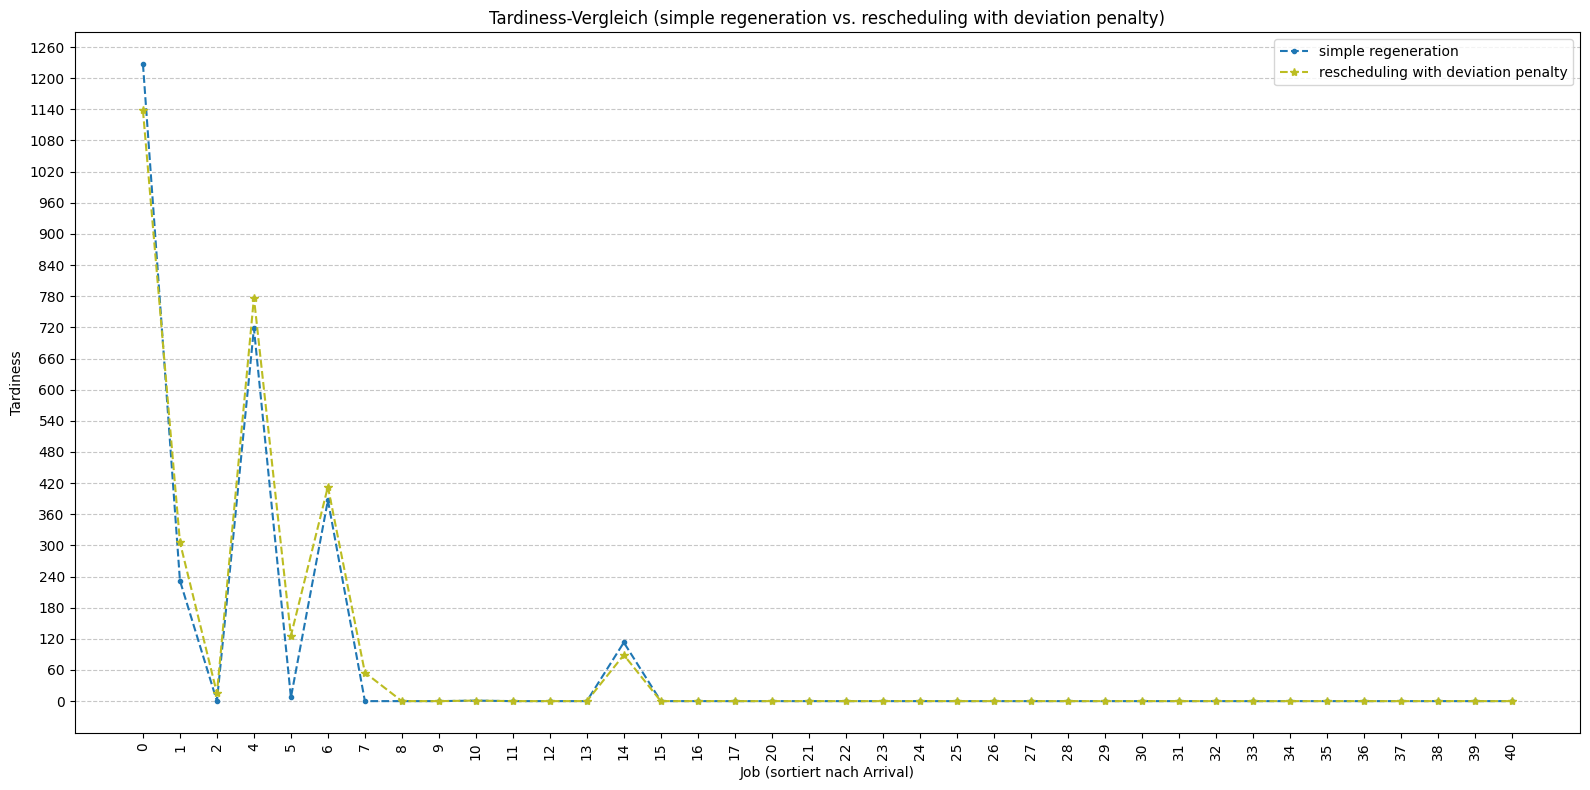

In [20]:
df_compare = proof.compare_and_plot_tardiness_single_day(
    df_plan_simple_last_ops_list[1],
    df_plan_devpen_last_ops_list[1],
    show_regression=False
)

## II) Plan-Nervosität - Wu

### "Simple" vs "mit Deviation Penalty"

In [21]:
# Totale Abweichung (Summe)
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list)
deviations_simple

[0.0,
 np.int64(10787),
 np.int64(6855),
 np.int64(8279),
 np.int64(2366),
 np.int64(4902)]

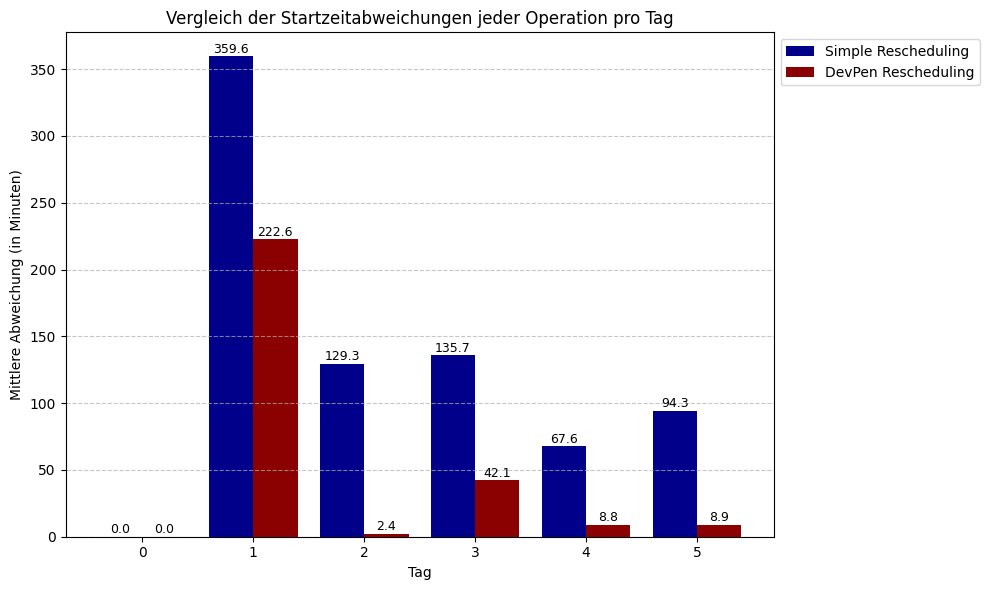

In [22]:
# Mittlere Abweichung
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list, method="mean")
deviations_devpen = calc.compute_daily_starttime_deviations(df_plan_devpen_list, method="mean")

# Plot
proof.plot_two_starttime_deviation_bars(deviations_simple, deviations_devpen,
                                  label_A="Simple Rescheduling",
                                  label_B="DevPen Rescheduling",
                                  ylabel="Mittlere Abweichung")


## Proof of Conecept V1

In [23]:
simple_tardi_ratio, simple_earli_ratio, simple_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_simple_last_ops_list)
devpen_tardi_ratio, devpen_earli_ratio, devpen_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_devpen_last_ops_list)

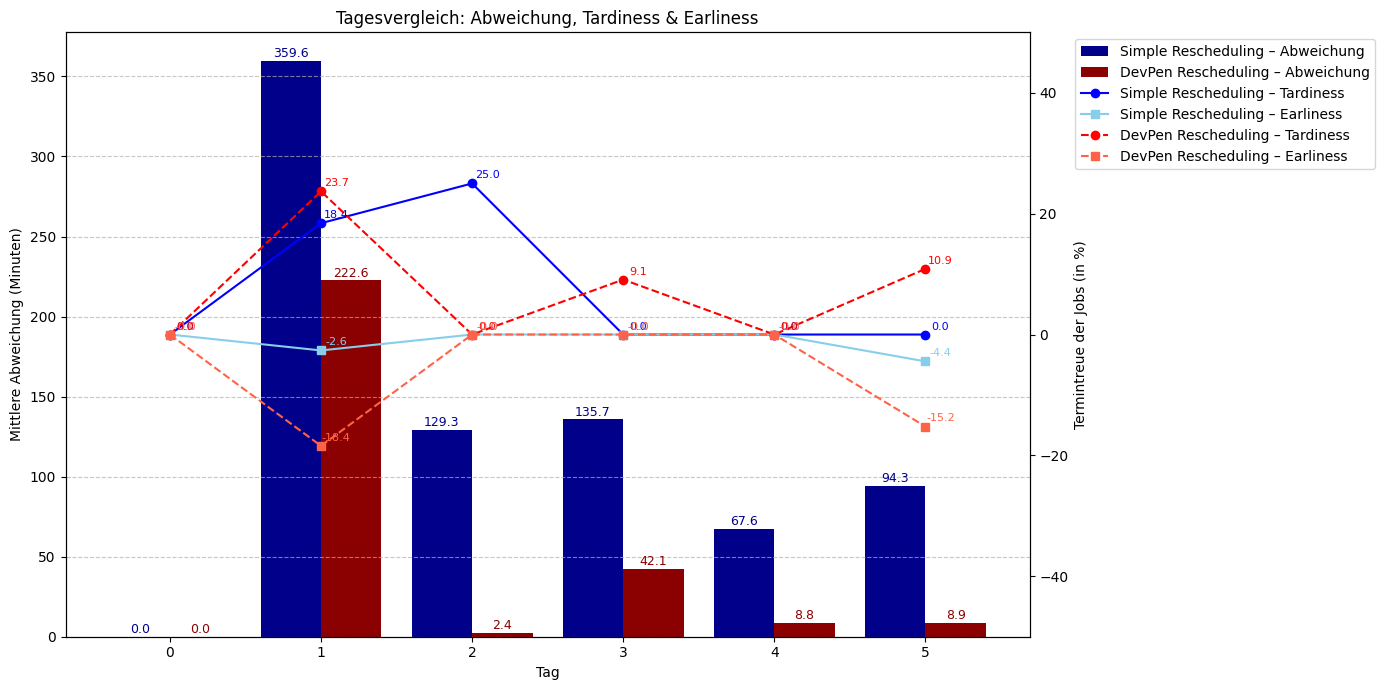

In [24]:
proof.proof_of_concept_v1(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Tardiness & Earliness",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Termintreue der Jobs (in %)",
    y_right_lim=50
)


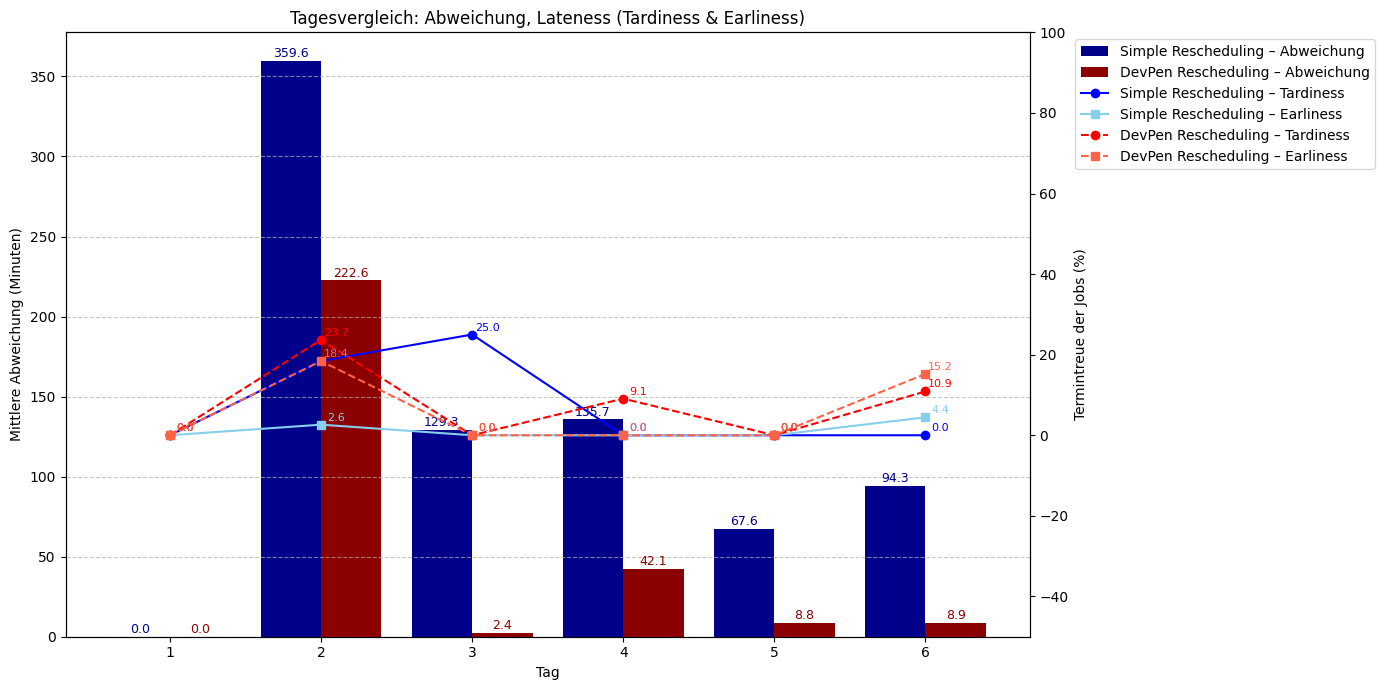

In [25]:
proof.proof_of_concept_v2(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Lateness (Tardiness & Earliness)",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Termintreue der Jobs",
    y_right_lim_min = -50,
    y_right_lim_max = 100,
    as_percentage=True  # zeigt Tardiness/Earliness in Prozent
)


In [26]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

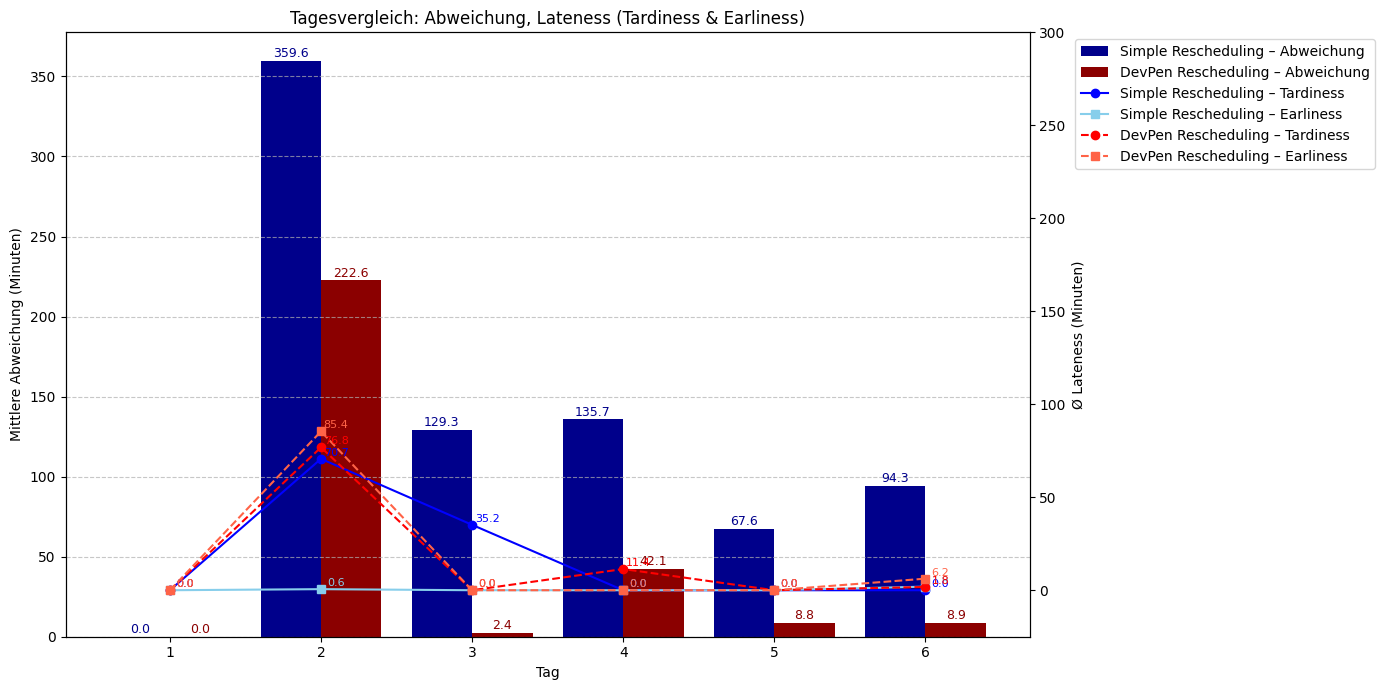

In [27]:
proof.proof_of_concept_v2(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Lateness (Tardiness & Earliness)",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Ø Lateness",
    y_right_lim_min = -25,
    y_right_lim_max=300,
    as_percentage=False
)

In [28]:
# Mittlere Abweichung
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list, method="mean", with_T1= False)
deviations_devpen = calc.compute_daily_starttime_deviations(df_plan_devpen_list, method="mean", with_T1= False)

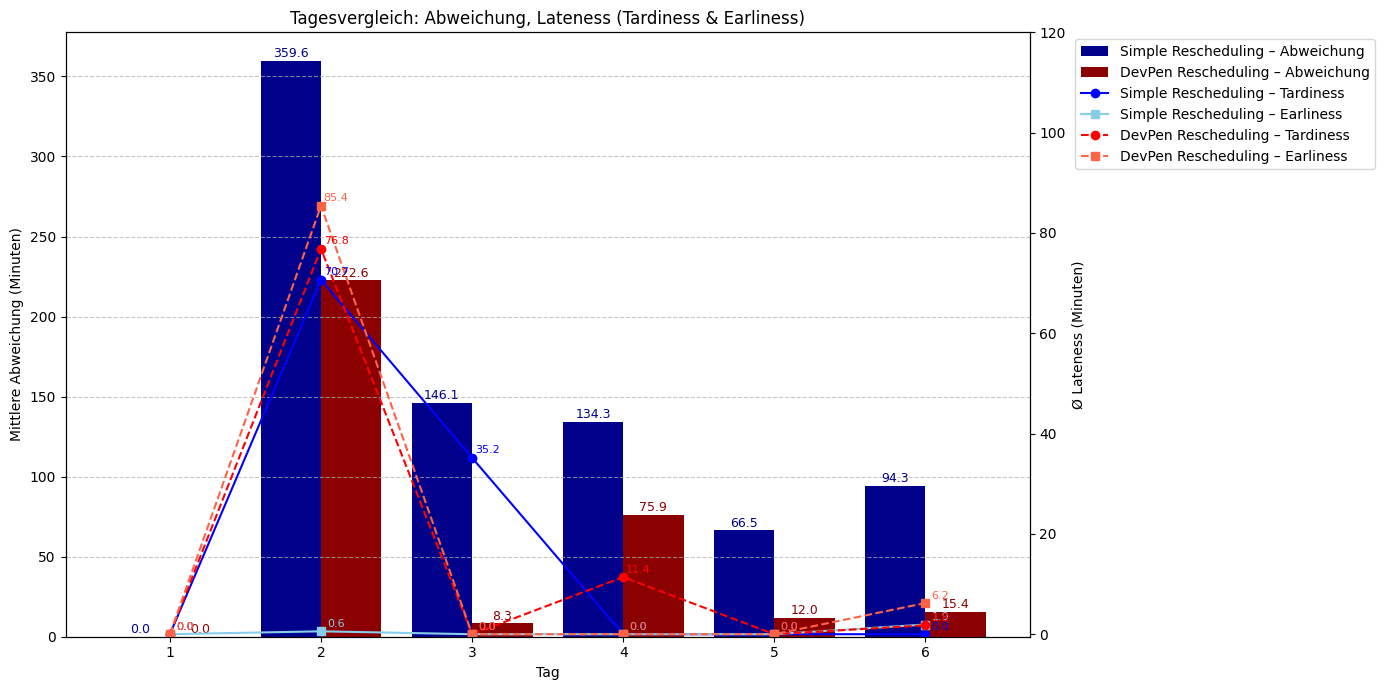

In [35]:
proof.proof_of_concept_v2(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Lateness (Tardiness & Earliness)",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Ø Lateness",
    y_right_lim_min = -0.5,
    y_right_lim_max=120,
    as_percentage=False
)